# In this Notebook:

1. Importing libraries
2. Importing data
3. Check stats of different columns
4. Creating parent status column
5. View the distribution of unique customers by parent status
6. Create income level column
7. View the distribution of unique customers by income level
8. Create pet owner column
9. Create baby house column
10. Visualise pet and baby columns
11. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure
12. Test the relationship between ordering habits and customer profile
12. View the distribution of unique customers by region
12. Compare customer profiles across regions and departments

# 1. Importing libraries

In [24]:
#importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 2. Importing data

In [25]:
#creating path to Instacart folder
path = r"/Users/katerinapilota/Desktop/Desktop - Pilot's Mac mini/dataimmersion/python/ 02:03:21 Instacart Basket Analysis"

In [26]:
#importing data
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_without_low.pkl'))

In [27]:
df.head()

,order_id,user_id,order_number,orders_days_of_the_week,time_of_order_24hr_time,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,freq_flag,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,region,customer_activity
0,2539329,1,1,2,8,0.0,196,1,0,Soda,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,regular_activity
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,regular_activity
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,regular_activity
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,regular_activity
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,regular_activity


In [28]:
df.shape

(30964564, 32)

# 3. Checking stats of different columns before segmentation

In [29]:
#checking income distribution of Instcart customers
df['income'].describe()

count    3.096456e+07
mean     9.967587e+04
std      4.314187e+04
min      2.590300e+04
25%      6.729200e+04
50%      9.676500e+04
75%      1.281020e+05
max      5.939010e+05
Name: income, dtype: float64

In [30]:
df['income'].max()

593901

In [31]:
df['income'].min()

25903

In [32]:
df['income'].mean()

99675.86510754681

In [33]:
df['income'].quantile([0.25, 0.75])

0.25     67292.0
0.75    128102.0
Name: income, dtype: float64

In [34]:
#checking contents of fam status column
df['fam_status'].value_counts(dropna = False)

married                             21743711
single                               5094410
divorced/widowed                     2645271
living with parents and siblings     1481172
Name: fam_status, dtype: int64

In [35]:
#checking age distribution
df['Age'].describe()

count    3.096456e+07
mean     4.946803e+01
std      1.848528e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: Age, dtype: float64

In [36]:
df['Age'].min()

18

In [37]:
df['Age'].max()

81

In [38]:
df['Age'].mean()

49.4680256760599

In [39]:
#checking contents of no of dependents
df['n_dependants'].value_counts(dropna = False)

3    7772516
0    7739681
2    7733261
1    7719106
Name: n_dependants, dtype: int64

# 4. Create parent status column

In [70]:
#Create parent status column
df['Parent_Status']=""

In [71]:
#young parents = 18-35 y/o, 1+ dependent, married
df.loc[((df['Age'] >= 18) & (df['Age'] <= 35) & (df['n_dependants'] >= 1) & (df['fam_status'] == 'married')), 'Parent_Status'] = 'Young Parents'

In [72]:
#Young single parent = 18-35 y/o, 1+ dependent, single or divorced/widowed
df.loc[((df['Age'] >= 18) & (df['Age'] <= 35) & (df['n_dependants'] >= 1) & (df['fam_status'] == 'single') | (df['fam_status'] == 'divorced/widowed')), 'Parent_Status'] = 'Young Single Parent'

In [73]:
#Single young adult = 18-35, 0 dependents, single
df.loc[((df['Age'] >= 18) & (df['Age'] <= 35) & (df['n_dependants'] == 0) & (df['fam_status'] == 'single')), 'Parent_Status'] = 'Single young adult'

In [74]:
#single adult = 35+, 0 kids, single or divorced/widowed
df.loc[((df['Age'] > 35) & (df['n_dependants'] == 0) & (df['fam_status'] == 'single') | (df['fam_status'] == 'divorced/widowed')), 'Parent_Status'] = 'Single adult'

In [75]:
#single parent = 35+, 1+ kid, single or divorced/ widowed
df.loc[((df['Age'] > 35) & (df['n_dependants'] >=1) & (df['fam_status'] == 'single') | (df['fam_status'] == 'divorced/widowed')), 'Parent_Status'] = 'Single parent'

In [80]:
#Middle aged parents = 35+ y/o, 1+ kid, married
df.loc[((df['Age'] > 35) & (df['Age'] < 60 ) & (df['n_dependants'] >= 1) & (df['fam_status'] == 'married')), 'Parent_Status'] = 'Middle Aged Parents'

In [81]:
#Mature parents = 60+ y/o, 1+ kid, married
df.loc[((df['Age'] > 60) & (df['n_dependants'] >= 1) & (df['fam_status'] == 'married')), 'Parent_Status'] = 'Mature Parents'

In [82]:
#Childless family = 0 kids, married
df.loc[(df['n_dependants'] == 0) & (df['fam_status'] == 'married'), 'Parent_Status'] = 'Empty Nester'

In [83]:
#student = <= 25, 0 kids, living with parents and siblings
df.loc[(df['fam_status'] == 'living with parents and siblings'), 'Parent_Status'] = 'Student'

# 5. View the distribution of unique customers by parent status

In [84]:
#call column count
df['Parent_Status'].value_counts(dropna= False)

Middle Aged Parents    8734535
Mature Parents         7929233
Young Parents          5079943
Single adult           2916720
Single parent          2645271
Single young adult     2177690
Student                1481172
Name: Parent_Status, dtype: int64

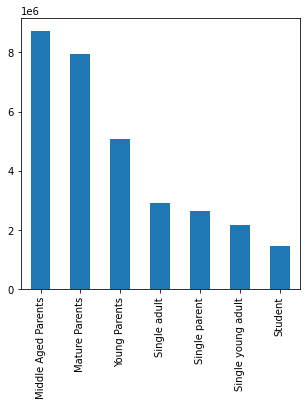

In [85]:
#plot bar chart of number of orders by parent status
df['Parent_Status'].value_counts().plot.bar()
plt.rcParams["figure.figsize"] = (5, 5)

In [86]:
#compare with count of unique_id/ parent status
unique_parent = df.groupby('Parent_Status').agg({'user_id':['nunique']})

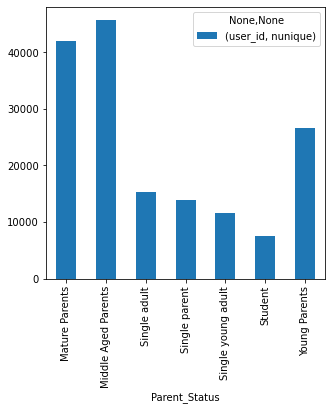

In [87]:
unique_parent_bar = unique_parent.plot.bar()
plt.rcParams["figure.figsize"] = (5, 5)

In [88]:
#save unique_parent_bar
unique_parent_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'unique_parent_bar.png'))

The number of unique users matches up, perhaps unsurprisingly, with order volum. More users ii each category means more sales in sum. Middle Aged parents make up the largest customer group and order the most, followed by Marure, then young parents. 

# 6. Create income level column

In [89]:
#Create income column

df['Income Level']=""

In [90]:
df.loc[(df['income'] < 67292), 'Income Level'] = 'Lower Income'

In [91]:
df.loc[(df['income'] >= 67292) & (df['income'] <= 128102), 'Income Level'] = 'Middle Income'

In [92]:
df.loc[(df['income'] > 128102), 'Income Level'] = 'Higher Income'

In [93]:
#call income level column
df['Income Level'].value_counts(dropna= False)

Middle Income    15482468
Higher Income     7741091
Lower Income      7741005
Name: Income Level, dtype: int64

# 7. View the distribution of unique customers by income level

In [94]:
#create income level df
unique_income = df.groupby('Income Level').agg({'user_id':['nunique']})

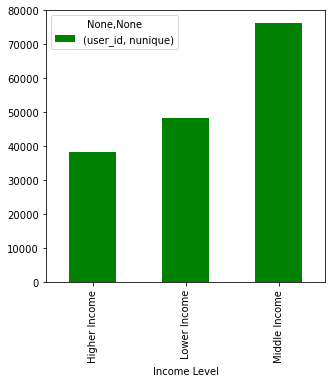

In [97]:
#plot income level
unique_income_bar = unique_income.plot.bar( color = 'green')

In [98]:
#save income level bar
unique_income_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'unique_income_bar.png'))

In [99]:
#view new columns in df
df.head()

,order_id,user_id,order_number,orders_days_of_the_week,time_of_order_24hr_time,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,STATE,Age,date_joined,n_dependants,fam_status,income,region,customer_activity,Parent_Status,Income Level
0,2539329,1,1,2,8,0.0,196,1,0,Soda,...,Alabama,31,2/17/2019,3,married,40423,South,regular_activity,Young Parents,Lower Income
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Alabama,31,2/17/2019,3,married,40423,South,regular_activity,Young Parents,Lower Income
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Alabama,31,2/17/2019,3,married,40423,South,regular_activity,Young Parents,Lower Income
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Alabama,31,2/17/2019,3,married,40423,South,regular_activity,Young Parents,Lower Income
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Alabama,31,2/17/2019,3,married,40423,South,regular_activity,Young Parents,Lower Income


# 8. Create a pet owner column

In [100]:
#Create pet order flag column

df['Pet Order Flag']=""

In [101]:
df.loc[(df['department_id'] == 8), 'Pet Order Flag'] = 1

In [102]:
df.loc[(df['department_id'] != 8), 'Pet Order Flag'] = 0

In [103]:
df['Pet Order Flag'].value_counts(dropna= False)

0    30871504
1       93060
Name: Pet Order Flag, dtype: int64

In [104]:
df.head()

,order_id,user_id,order_number,orders_days_of_the_week,time_of_order_24hr_time,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,Age,date_joined,n_dependants,fam_status,income,region,customer_activity,Parent_Status,Income Level,Pet Order Flag
0,2539329,1,1,2,8,0.0,196,1,0,Soda,...,31,2/17/2019,3,married,40423,South,regular_activity,Young Parents,Lower Income,0
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,31,2/17/2019,3,married,40423,South,regular_activity,Young Parents,Lower Income,0
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,31,2/17/2019,3,married,40423,South,regular_activity,Young Parents,Lower Income,0
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,31,2/17/2019,3,married,40423,South,regular_activity,Young Parents,Lower Income,0
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,31,2/17/2019,3,married,40423,South,regular_activity,Young Parents,Lower Income,0


In [105]:
# Create Pet Owner column 
df['Pet Owner'] =""

In [106]:
# If Pet Order >= 1 then "Pet Owner"
df.loc[(df['Pet Order Flag'] >= 1), 'Pet Owner'] = "Pet Owner"

In [107]:
df.loc[(df['Pet Order Flag'] == 0), 'Pet Owner'] = "Not Pet Owner"

In [108]:
df['Pet Owner'].value_counts()

Not Pet Owner    30871504
Pet Owner           93060
Name: Pet Owner, dtype: int64

In [109]:
#drop pet flag column
df.drop(columns = 'Pet Order Flag')

,order_id,user_id,order_number,orders_days_of_the_week,time_of_order_24hr_time,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,Age,date_joined,n_dependants,fam_status,income,region,customer_activity,Parent_Status,Income Level,Pet Owner
0,2539329,1,1,2,8,0.0,196,1,0,Soda,...,31,2/17/2019,3,married,40423,South,regular_activity,Young Parents,Lower Income,Not Pet Owner
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,31,2/17/2019,3,married,40423,South,regular_activity,Young Parents,Lower Income,Not Pet Owner
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,31,2/17/2019,3,married,40423,South,regular_activity,Young Parents,Lower Income,Not Pet Owner
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,31,2/17/2019,3,married,40423,South,regular_activity,Young Parents,Lower Income,Not Pet Owner
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,31,2/17/2019,3,married,40423,South,regular_activity,Young Parents,Lower Income,Not Pet Owner
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32404850,3308056,106143,22,4,20,10.0,19675,1,1,Organic Raspberry Black Tea,...,25,5/26/2017,0,single,53755,West,regular_activity,Single young adult,Lower Income,Not Pet Owner
32404851,2988973,106143,23,2,22,5.0,19675,1,1,Organic Raspberry Black Tea,...,25,5/26/2017,0,single,53755,West,regular_activity,Single young adult,Lower Income,Not Pet Owner
32404852,930,106143,24,6,12,4.0,19675,1,1,Organic Raspberry Black Tea,...,25,5/26/2017,0,single,53755,West,regular_activity,Single young adult,Lower Income,Not Pet Owner
32404853,467253,106143,25,6,16,7.0,19675,1,1,Organic Raspberry Black Tea,...,25,5/26/2017,0,single,53755,West,regular_activity,Single young adult,Lower Income,Not Pet Owner


# 9. Create baby column

In [110]:
#create baby order flag
df['Baby Order Flag']=""

In [111]:
df.loc[(df['department_id'] == 18), 'Baby Order Flag'] = 1

In [112]:
df.loc[(df['department_id'] != 18), 'Baby Order Flag'] = 0

In [113]:
df['Baby Order Flag'].value_counts(dropna= False)

0    30554172
1      410392
Name: Baby Order Flag, dtype: int64

In [114]:
#use flag to make a more intuitive baby house column
df['Baby House'] =""

In [115]:
df.loc[(df['Baby Order Flag'] >= 1), 'Baby House'] = "Baby House"

In [116]:
df.loc[(df['Baby Order Flag'] == 0), 'Baby House'] = "Not Baby House"

In [117]:
df.head()

,order_id,user_id,order_number,orders_days_of_the_week,time_of_order_24hr_time,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,fam_status,income,region,customer_activity,Parent_Status,Income Level,Pet Order Flag,Pet Owner,Baby Order Flag,Baby House
0,2539329,1,1,2,8,0.0,196,1,0,Soda,...,married,40423,South,regular_activity,Young Parents,Lower Income,0,Not Pet Owner,0,Not Baby House
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,married,40423,South,regular_activity,Young Parents,Lower Income,0,Not Pet Owner,0,Not Baby House
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,married,40423,South,regular_activity,Young Parents,Lower Income,0,Not Pet Owner,0,Not Baby House
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,married,40423,South,regular_activity,Young Parents,Lower Income,0,Not Pet Owner,0,Not Baby House
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,married,40423,South,regular_activity,Young Parents,Lower Income,0,Not Pet Owner,0,Not Baby House


In [118]:
df.drop(columns = ['Baby Order Flag', 'Pet Order Flag'],inplace = True)

In [120]:
#view all not truncated result
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [121]:
df.head()

,order_id,user_id,order_number,orders_days_of_the_week,time_of_order_24hr_time,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,Busiest day,Two busiest days,busiest_period_day,max_order,loyalty_flag,mean_spend,spend_flag,median_ordering,freq_flag,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,region,customer_activity,Parent_Status,Income Level,Pet Owner,Baby House
0,2539329,1,1,2,8,0.0,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,regular_activity,Young Parents,Lower Income,Not Pet Owner,Not Baby House
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Two least busy days,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,regular_activity,Young Parents,Lower Income,Not Pet Owner,Not Baby House
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Two least busy days,Most orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,regular_activity,Young Parents,Lower Income,Not Pet Owner,Not Baby House
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy day,Two least busy days,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,regular_activity,Young Parents,Lower Income,Not Pet Owner,Not Baby House
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy day,Two least busy days,Most orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,regular_activity,Young Parents,Lower Income,Not Pet Owner,Not Baby House


# 10 Visualise pet owners and baby house

In [125]:
#Create baby house df
df_baby = df.groupby('Baby House').agg({'user_id':['nunique']})

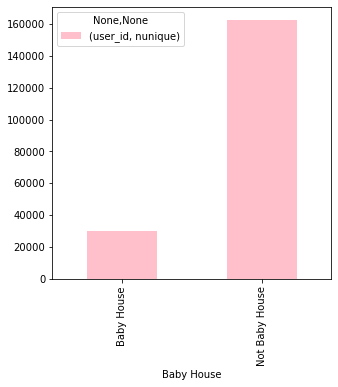

In [128]:
#plot bar chart of baby house
bar_baby = df_baby.plot.bar(color = 'pink')

In [130]:
#save bar_baby
bar_baby.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'bar_baby.png'))

In [131]:
#Create df for pet owner status bar chart
df_pet = df.groupby('Pet Owner').agg({'user_id':['nunique']})

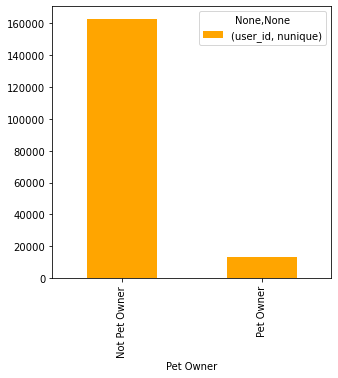

In [132]:
bar_pet = df_pet.plot.bar(color = 'orange')

In [133]:
#Export Pet Bar chart
bar_pet.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'bar_pet_owner.png'))

# 11. Aggregate the max, min, mean variables on a customer-profile level for usage frequency and expenditure

In [135]:
#finding the max (mean_spend) for parent status
df.groupby('Parent_Status').agg({'mean_spend': ['max']})

,mean_spend
,max
Parent_Status,
Mature Parents,7414.485185
Middle Aged Parents,6983.593023
Single adult,15006.940000
Single parent,14042.512281
Single young adult,8794.882427
Student,10209.987755
Young Parents,5271.136842


In [137]:
#finding the min (mean_spend) for parent status
df.groupby('Parent_Status').agg({'mean_spend': ['min']})

,mean_spend
,min
Parent_Status,
Mature Parents,1.262500
Middle Aged Parents,1.500000
Single adult,1.000000
Single parent,1.308333
Single young adult,1.800000
Student,2.133333
Young Parents,1.000000


In [138]:
#finding the mean (mean_spend) for each customer profile
df.groupby('Parent_Status').agg({'mean_spend': ['mean']})

,mean_spend
,mean
Parent_Status,
Mature Parents,11.788405
Middle Aged Parents,11.844850
Single adult,12.505260
Single parent,11.532741
Single young adult,12.255711
Student,10.890167
Young Parents,12.359016


Although middle aged and mature parents are the largest customer base and make the most orders, single adults, single parents, and young parents spend the most on average per order. This is useful knowledge for the markering department when targetd ads for products based on price. 

copied from csika, no edit

In [140]:
#Do certain Parent categories shop at different hours of the day? No. 

df.groupby('Parent_Status').agg({'time_of_order_24hr_time':['max','min','mean','median']})

time_of_order_24hr_time                      
                                        max min       mean median
Parent_Status                                                    
Mature Parents                           23   0  13.410960     13
Middle Aged Parents                      23   0  13.418342     13
Single adult                             23   0  13.427102     13
Single parent                            23   0  13.429982     13
Single young adult                       23   0  13.402568     13
Student                                  23   0  13.401284     13
Young Parents                            23   0  13.385642     13

In [141]:
#Do different ages order at different times of the day? No.

df.groupby('Age').agg({'time_of_order_24hr_time':['max','min','mean','median']})

time_of_order_24hr_time                      
                        max min       mean median
Age                                              
18                       23   0  13.342909     13
19                       23   0  13.389554     13
20                       23   0  13.413275     13
21                       23   0  13.471203     13
22                       23   0  13.371326     13
23                       23   0  13.336911     13
24                       23   0  13.377682     13
25                       23   0  13.390591     13
26                       23   0  13.368712     13
27                       23   0  13.351896     13
28                       23   0  13.438990     13
29                       23   0  13.440507     13
30                       23   0  13.482912     13
31                       23   0  13.391813     13
32                       23   0  13.325291     13
33                       23   0  13.436012     13
34                       23   0  13.349485     13
35                       23   0  13.387988     13
36                       23   0  13.409537     13
37                       23   0  13.403677     13
38                       23   0  13.464656     13
39                       23   0  13.438322     13
40                       23   0  13.387325     13
41                       23   0  13.392123     13
42                       23   0  13.446612     13
43                       23   0  13.430990     13
44                       23   0  13.442131     13
45                       23   0  13.468997     13
46                       23   0  13.417194     13
47                       23   0  13.435875     13
48                       23   0  13.417666     13
49                       23   0  13.381268     13
50                       23   0  13.472132     13
51                       23   0  13.442818     13
52                       23   0  13.391319     13
53                       23   0  13.406080     13
54                       23   0  13.426070     13
55                       23   0  13.390864     13
56                       23   0  13.394363     13
57                       23   0  13.470948     13
58                       23   0  13.395805     13
59                       23   0  13.365664     13
60                       23   0  13.468457     13
61                       23   0  13.429214     13
62                       23   0  13.350836     13
63                       23   0  13.428105     13
64                       23   0  13.451606     13
65                       23   0  13.459017     13
66                       23   0  13.370237     13
67                       23   0  13.441294     13
68                       23   0  13.378707     13
69                       23   0  13.464383     13
70                       23   0  13.384298     13
71                       23   0  13.311455     13
72                       23   0  13.340218     13
73                       23   0  13.515027     13
74                       23   0  13.378613     13
75                       23   0  13.367693     13
76                       23   0  13.468218     13
77                       23   0  13.479760     13
78                       23   0  13.376476     13
79                       23   0  13.358353     13
80                       23   0  13.439890     13
81                       23   0  13.479789     13

In [143]:
#Does parent status affect which day of the week a customer is likley to shop? No.

df.groupby('Parent_Status').agg({'orders_days_of_the_week':['max','min','mean','median']})

orders_days_of_the_week                     
                                        max min      mean median
Parent_Status                                                   
Mature Parents                            6   0  2.745449      3
Middle Aged Parents                       6   0  2.746140      3
Single adult                              6   0  2.731942      3
Single parent                             6   0  2.751114      3
Single young adult                        6   0  2.723976      3
Student                                   6   0  2.747856      3
Young Parents                             6   0  2.732868      3

In [144]:
#Do certain ages tend to be pet owners? No.

df.groupby('Pet Owner').agg({'Age':['mean','median','min', 'max']})

Age               
                    mean median min max
Pet Owner                              
Not Pet Owner  49.468298     49  18  81
Pet Owner      49.377724     50  18  81

In [146]:
#Do females or males tend to place orders fewer days apart? No difference

df.groupby('Gender').agg({'days_since_prior_order':['mean','median','min', 'max']})

days_since_prior_order                  
                         mean median  min   max
Gender                                         
Female              10.215717    7.0  0.0  30.0
Male                10.244719    7.0  0.0  30.0

In [148]:
#Do females or males tend to place orders at certain times of day?  No.

df.groupby('Gender').agg({'time_of_order_24hr_time':['mean','median','min', 'max']})

time_of_order_24hr_time               
                          mean median min max
Gender                                       
Female               13.409537     13   0  23
Male                 13.412406     13   0  23

In [151]:
#Do higher spenders shop at different hours of the day? No.

df.groupby('spend_flag').agg({'time_of_order_24hr_time':['mean','median','min', 'max']})

time_of_order_24hr_time               
                                mean median min max
spend_flag                                         
High spender               13.289870     13   0  23
Low spender                13.413388     13   0  23

In [152]:
#Do higher spenders shop on different days of the week? No.

df.groupby('spend_flag').agg({'orders_days_of_the_week':['mean','median','min', 'max']})

orders_days_of_the_week               
                                mean median min max
spend_flag                                         
High spender                2.784965      3   0   6
Low spender                 2.740531      3   0   6

In [153]:
#Do pet owners tend to have higher incomes? Yes, Pet owners have slightly higher incomes.

df.groupby('Pet Owner').agg({'income':['mean','median','min', 'max']})

income                      
                        mean median    min     max
Pet Owner                                         
Not Pet Owner   99663.357562  96760  25903  593901
Pet Owner      103825.088577  98767  26256  591089

In [154]:
#Do those with higher income levels order more frequently? No

df.groupby('Income Level').agg({'days_since_prior_order':['mean','median','min', 'max']})

days_since_prior_order                  
                                mean median  min   max
Income Level                                          
Higher Income              10.183081    7.0  0.0  30.0
Lower Income               10.356356    7.0  0.0  30.0
Middle Income              10.190914    7.0  0.0  30.0

In [157]:
#Do households with babies place orders fewer days apart? No.

df.groupby('Baby House').agg({'days_since_prior_order':['mean','median','min', 'max']})

days_since_prior_order                  
                                 mean median  min   max
Baby House                                             
Baby House                   9.335526    7.0  0.0  30.0
Not Baby House              10.242334    7.0  0.0  30.0

In [176]:
#Are differently priced products purchased at different times?
df.groupby('price_range_loc').agg({'orders_days_of_the_week':['mean','median','min', 'max']})

orders_days_of_the_week               
                                      mean median min max
price_range_loc                                          
High-range product                2.733004      2   0   6
Low range product                 2.746626      3   0   6
Mid-range product                 2.687334      2   0   6

# 12. Grouping unique customers by location

In [158]:
df_region = df.groupby('region').agg({'user_id':['nunique']})

In [160]:
df_region

,user_id
,nunique
region,
Midwest,38376
Northeast,28581
South,54193
West,41481


<AxesSubplot:xlabel='region'>

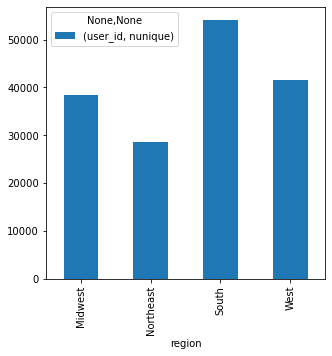

In [161]:
df_region.plot.bar()

In [162]:
df_state = df.groupby('STATE').agg({'user_id':['nunique']})

In [163]:
df_state

,user_id
,nunique
STATE,
Alabama,3233
Alaska,3212
Arizona,3182
Arkansas,3145
California,3169
Colorado,3162
Connecticut,3184
Delaware,3209


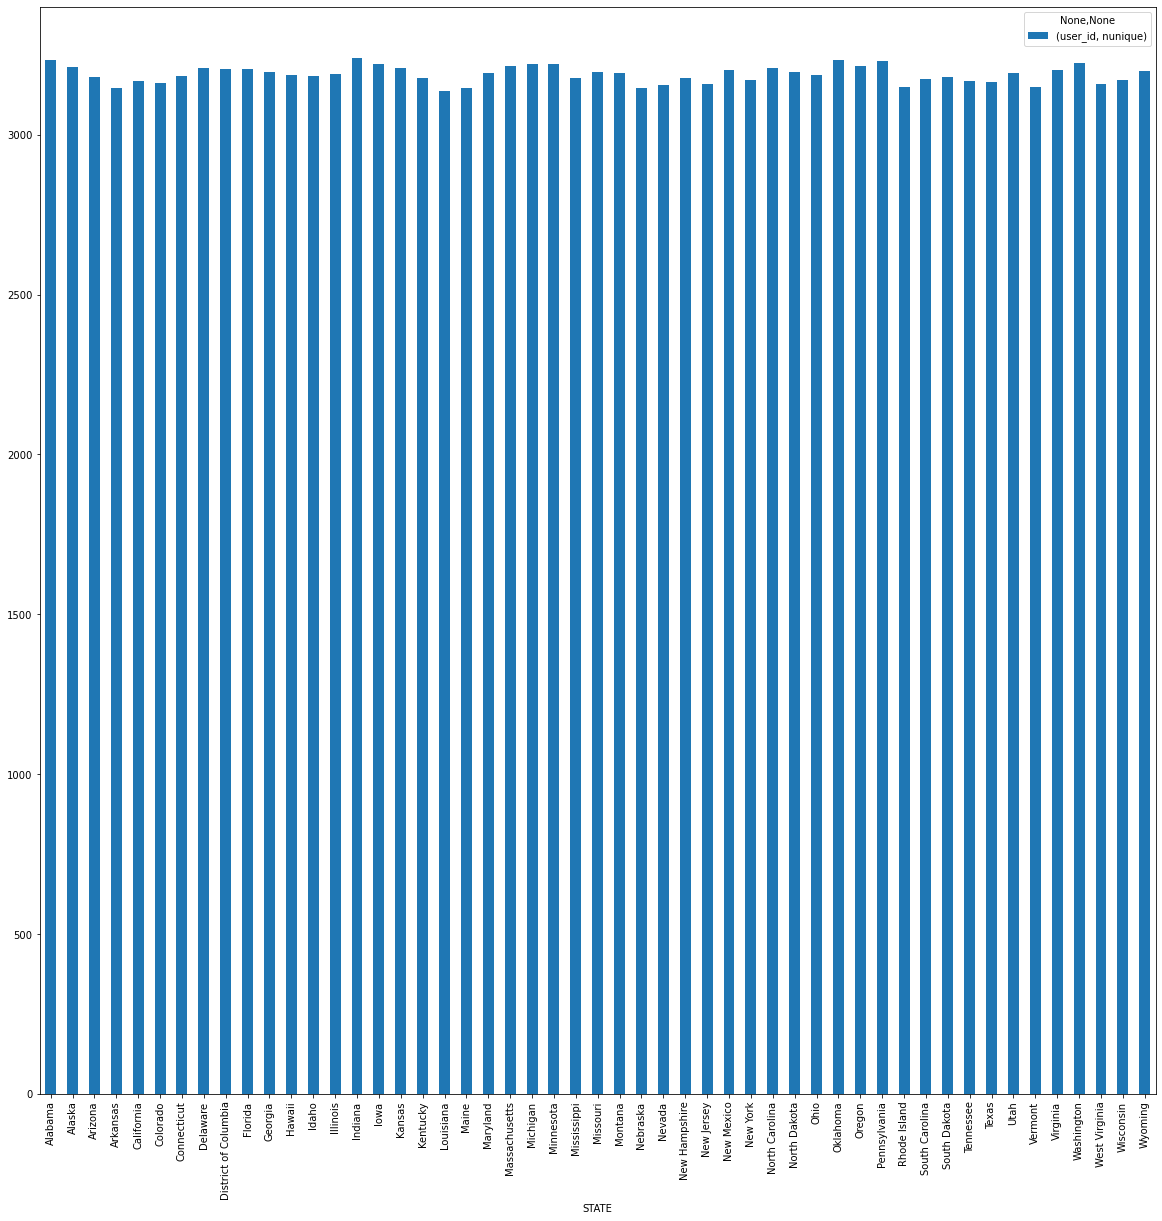

In [167]:
df_state.plot.bar()
plt.rcParams["figure.figsize"] = (30, 30)

# 13. Group customers by parent status and region

In [168]:
#Count of user_id in each Parent category by region

df_parent_region = df.groupby(['region','Parent_Status']).agg({'user_id':['nunique']})

In [169]:
df_parent_region

user_id
                              nunique
region    Parent_Status              
Midwest   Mature Parents         9874
          Middle Aged Parents   10926
          Single adult           3739
          Single parent          3207
          Single young adult     2620
          Student                1840
          Young Parents          6170
Northeast Mature Parents         7285
          Middle Aged Parents    8163
          Single adult           2682
          Single parent          2471
          Single young adult     2102
          Student                1226
          Young Parents          4652
South     Mature Parents        14063
          Middle Aged Parents   15150
          Single adult           5025
          Single parent          4605
          Single young adult     3907
          Student                2604
          Young Parents          8839
West      Mature Parents        10720
          Middle Aged Parents   11562
          Single adult           3922
          Single parent          3548
          Single young adult     2899
          Student                1938
          Young Parents          6892

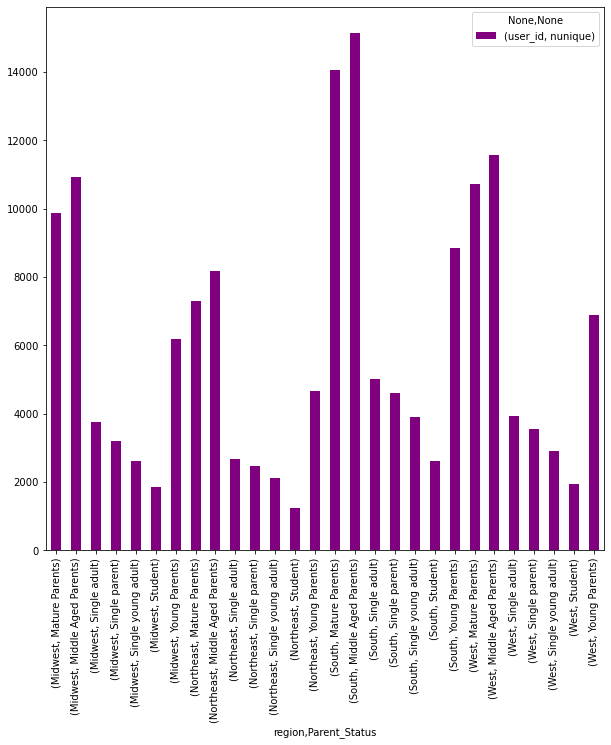

In [203]:
#plot profile distribution by region
bar_parent_region = df_parent_region.plot.bar(color = 'purple')
plt.rcParams["figure.figsize"] = (10, 10)

In [204]:
bar_parent_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'bar_parent_region.png'))

# Group customers by Pet Owner Status and Region

In [194]:
crosstab_pet_region = pd.crosstab(df['region'], df['Pet Owner'], dropna = False)

In [195]:
crosstab_pet_region

Pet Owner,Not Pet Owner,Pet Owner
region,,
Midwest,7240155,21358
Northeast,5446951,17734
South,10281230,29909
West,7903168,24059


<AxesSubplot:xlabel='region'>

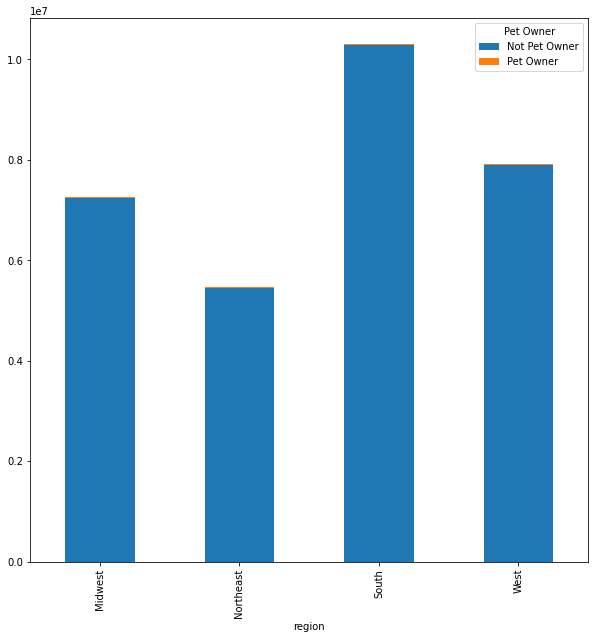

In [196]:
crosstab_pet_region.plot.bar(stacked = True)

percentages of pet owner more or less reflect the distribution of users and customer profiles

# Group Customers by Parent Status and department

In [188]:
#Parent Status by Department
crosstab_profile_department = pd.crosstab(df['department_id'],df['Parent_Status'], dropna=False )

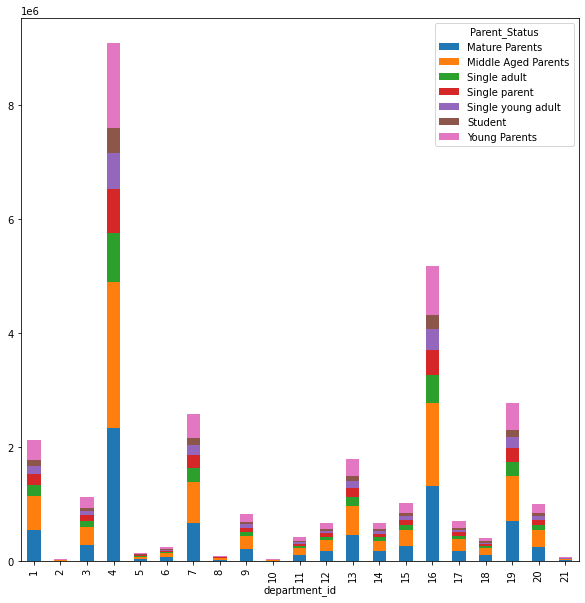

In [205]:
bar_parent_department = crosstab_profile_department.plot.bar(stacked=True)

Each age category places roughly the same percentage of orders from each department - Middle Aged Parents always make up the largest percentage while Young Parents make up the lowest percentage. 

Produce & Dairy/eggs are by far the most popular departments for each age group.

Surprisingly, all categories (including No Dependants) purchase items from the Baby department. Perhaps as gifts?

In [206]:
bar_parent_department.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'bar_parent_region.png'))

# Group customers by Pet Owner and department

In [197]:
crosstab_pet_department = pd.crosstab(df['department_id'],df['Pet Owner'], dropna=False )

<AxesSubplot:xlabel='department_id'>

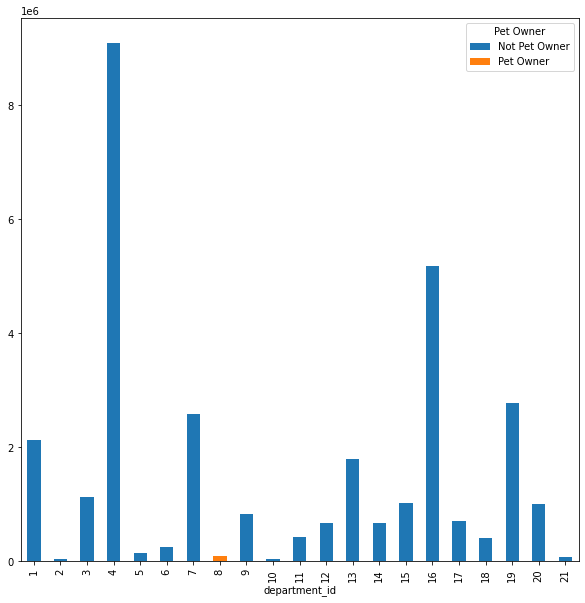

In [198]:
crosstab_pet_department.plot.bar(stacked = True)

Circular logic = pet owner is defined by purchases made from pet department (8), so this analysis is moot and won't be saved. 

# Group customers by Income Level and Department

In [200]:
crosstab_income_department = pd.crosstab(df['department_id'],df['Income Level'], dropna=False )

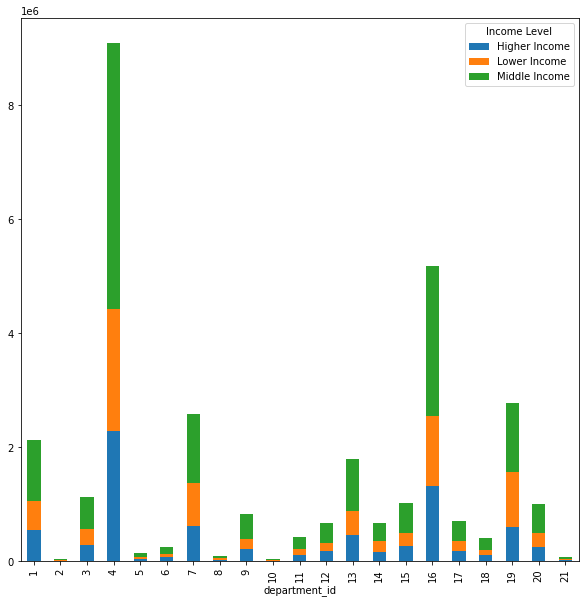

In [207]:
bar_crosstab_income_department = crosstab_income_department.plot.bar(stacked = True)

There are more orders from middle income users, which makes sense considering they make up the bulk of Instacart's customer base. 

Each income level places roughly the same percentage of orders from each department - Higher Income always make up the largest percentage followed by Middle Income then Lower Income.

Percentages to take note of are:

*Middle income groups purchase the least from Departments 5 (alcohol) & 8 (pet)

*Lower income consistently make up 4-6% of most departments but this increases greatly in Department 19 (snacks) where they make up 11%

*The percentage of Higher income orders on the otherhand drop to 26% for snacks (the lowest percentage) for higher income

*Higher income customers largest percentage spent is in deparments 8 (pets) & 12(meat/seafood)

In [209]:
bar_crosstab_income_department.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'bar_crosstab_income_department.png'))

# income level bt region and depatment

income level by region

In [211]:
#Crosstab parent region and income level

crosstab_region_income = pd.crosstab(df['region'],df['Income Level'], dropna=False )

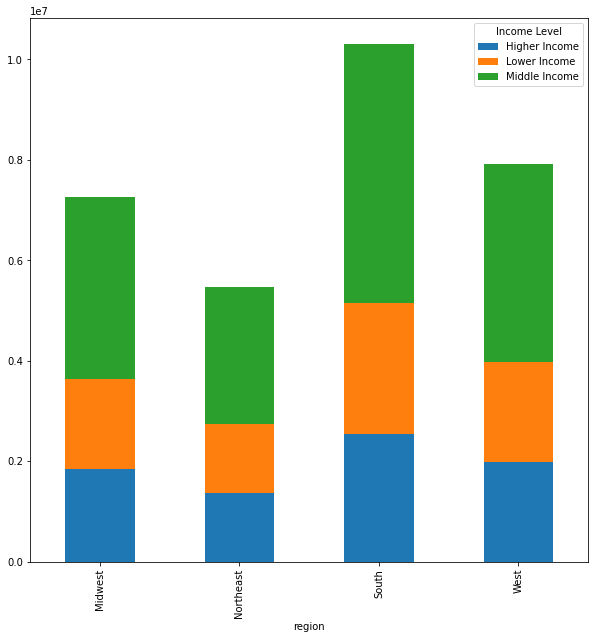

In [213]:
bar_crosstab_region_income = crosstab_region_income.plot.bar(stacked=True)

# Make a countplot for frequency of orders by departments

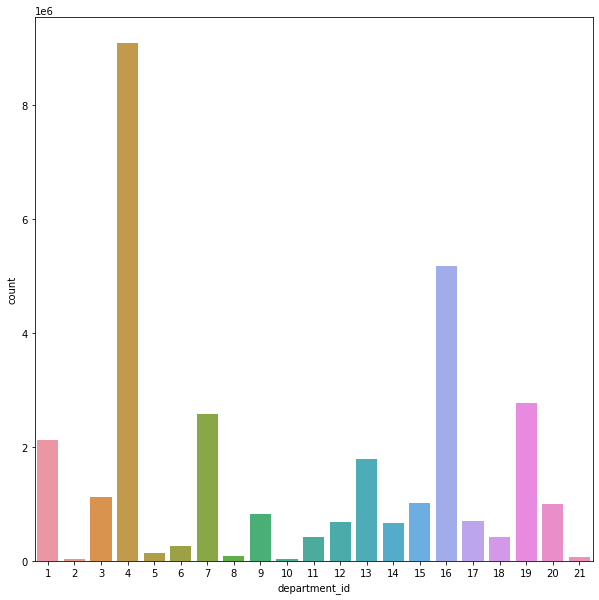

In [214]:
department_count = sns.countplot (x = 'department_id', data = df)

In [215]:
#export countplot
department_count.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'department_count.png'))

End.